**Data Science (Minor Project)**

# **Cyber Threat Analysis**

---



**Objective:**

This project aims to systematically analyze significant cyber incidents from various industries, identify common attack patterns, vulnerabilities, and defense mechanisms, and assess the impact on organizations globally. The goal is to understand the scope of cyber threats, how they evolve, and what defense mechanisms are most effective in mitigating them.

**Overview:**

The project will focus on documenting and analyzing cyber incidents from different countries, years, and industries. It will provide an in-depth look into the attack types, financial losses, affected users, attack sources, security vulnerabilities, defense mechanisms, and the time taken to resolve incidents. By examining historical data, the project will offer insights into cybersecurity trends and help organizations prepare for future threats.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Global_Cybersecurity_Threats.csv to Global_Cybersecurity_Threats (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv("Global_Cybersecurity_Threats.csv")

In [ ]:
print(df.info)

<bound method DataFrame.info of       Country  Year        Attack Type     Target Industry  \
0       China  2019           Phishing           Education   
1       China  2019         Ransomware              Retail   
2       India  2017  Man-in-the-Middle                  IT   
3          UK  2024         Ransomware  Telecommunications   
4     Germany  2018  Man-in-the-Middle                  IT   
...       ...   ...                ...                 ...   
2995       UK  2021         Ransomware          Government   
2996   Brazil  2023      SQL Injection  Telecommunications   
2997   Brazil  2017      SQL Injection                  IT   
2998       UK  2022      SQL Injection                  IT   
2999  Germany  2021      SQL Injection              Retail   

      Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                             80.53                    773169  Hacker Group   
1                             62.19                    295961  Ha

In [ ]:
print(df.shape)

(3000, 10)


In [ ]:
print(df.describe) #Summary Statistics

<bound method NDFrame.describe of       Country  Year        Attack Type     Target Industry  \
0       China  2019           Phishing           Education   
1       China  2019         Ransomware              Retail   
2       India  2017  Man-in-the-Middle                  IT   
3          UK  2024         Ransomware  Telecommunications   
4     Germany  2018  Man-in-the-Middle                  IT   
...       ...   ...                ...                 ...   
2995       UK  2021         Ransomware          Government   
2996   Brazil  2023      SQL Injection  Telecommunications   
2997   Brazil  2017      SQL Injection                  IT   
2998       UK  2022      SQL Injection                  IT   
2999  Germany  2021      SQL Injection              Retail   

      Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                             80.53                    773169  Hacker Group   
1                             62.19                    295961  

**Data Visualizations**

1.Bar Chart shows Cyber Threats Type

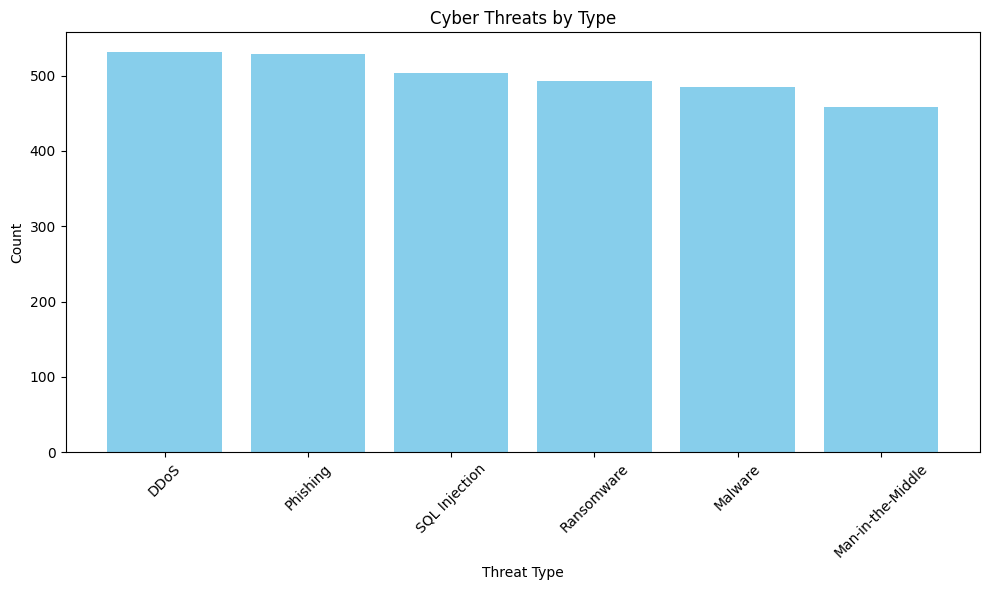

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
threat_counts = df['Attack Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(threat_counts.index, threat_counts.values, color='skyblue')
plt.title('Cyber Threats by Type')
plt.xlabel('Threat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Pie Chart of Type of Threats Distribution

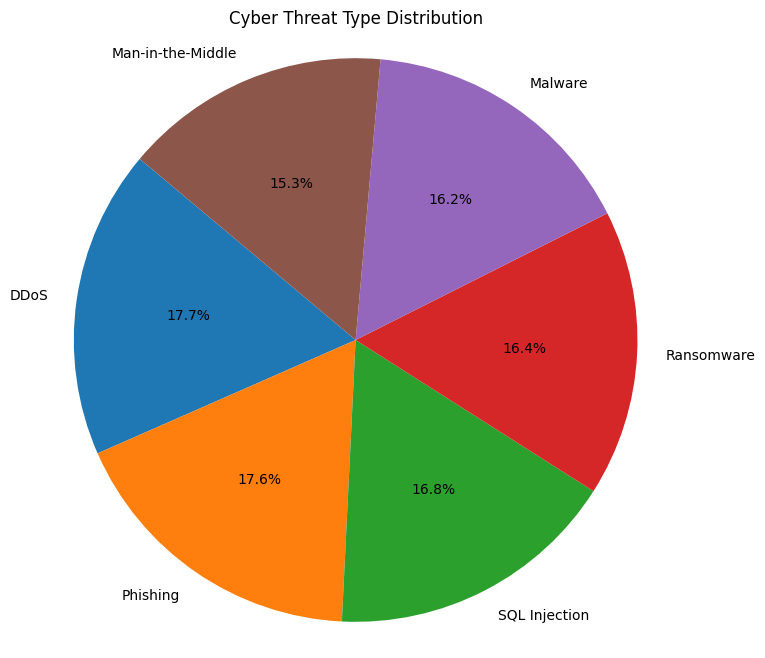

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(threat_counts.values, labels=threat_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cyber Threat Type Distribution')
plt.axis('equal')
plt.show()

3. Bar Chart showing Top 10 Countries Being Attacked

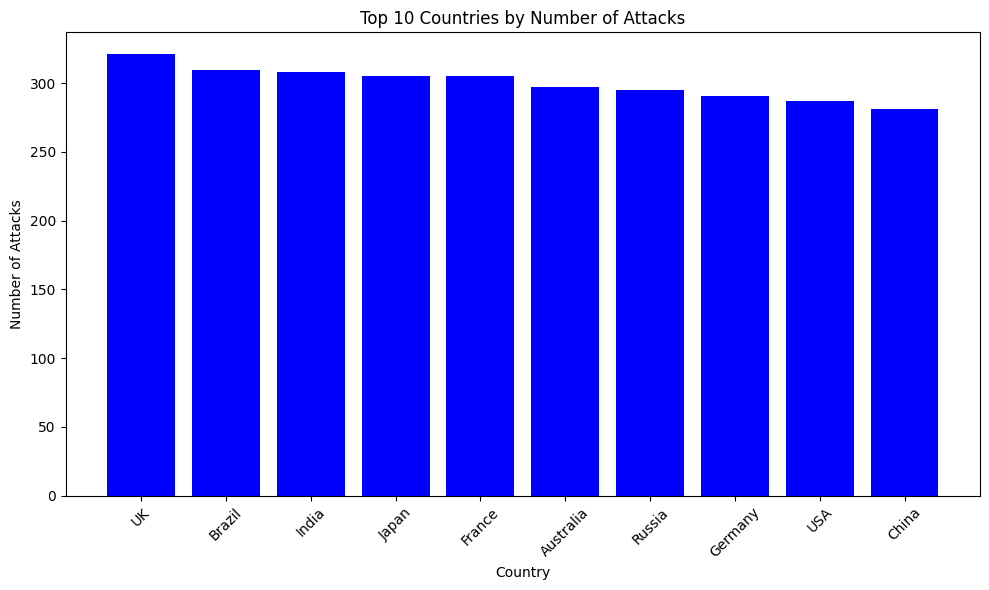

In [ ]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries.values, color='blue')
plt.title('Top 10 Countries by Number of Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Line Chart showing Total Financial Loss by Cyber Attacks Yearly

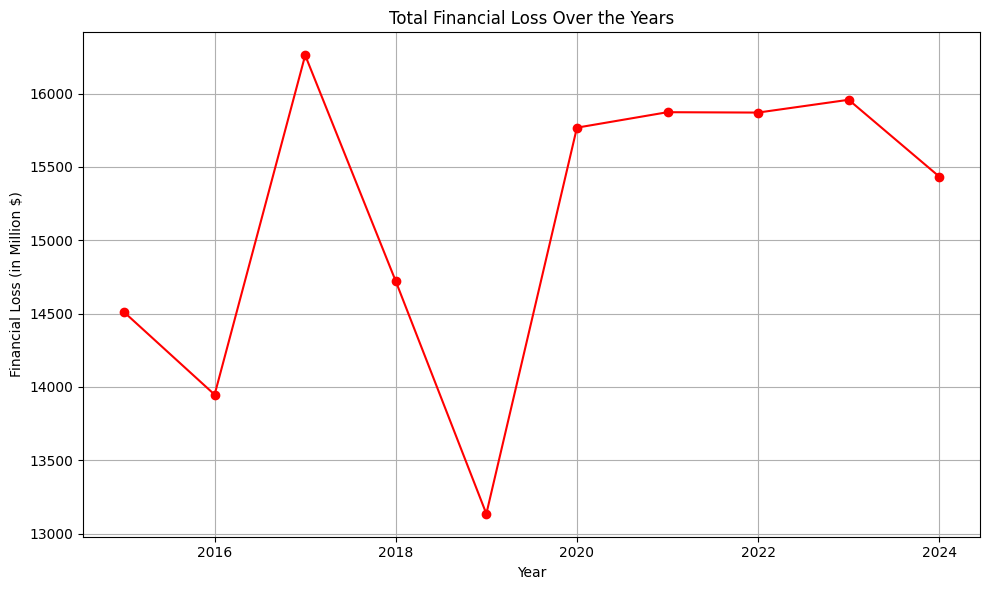

In [ ]:
loss_by_year = df.groupby('Year')['Financial Loss (in Million $)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(loss_by_year.index, loss_by_year.values, marker='o', linestyle='-', color='red')
plt.title('Total Financial Loss Over the Years')
plt.xlabel('Year')
plt.ylabel('Financial Loss (in Million $)')
plt.grid(True)
plt.tight_layout()
plt.show()

5. Bar Histogram shows Average Resolution Time Taken by Attack Source

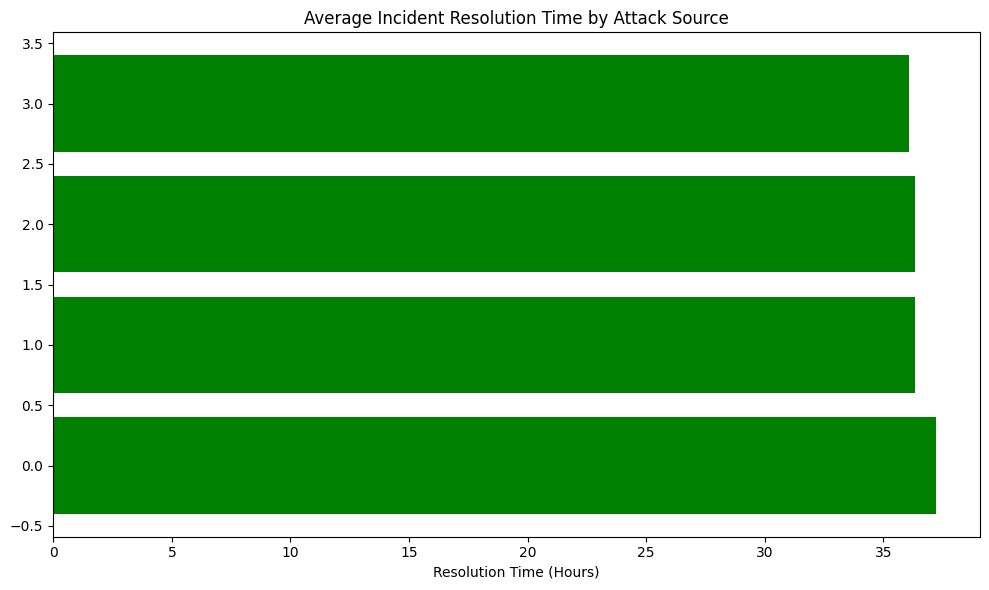

In [ ]:
resolution_time = df.groupby('Attack Source')['Incident Resolution Time (in Hours)'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(resolution_time.index, resolution_time.values, color='green')
plt.title('Average Incident Resolution Time by Attack Source')
plt.xlabel('Resolution Time (Hours)')
plt.tight_layout()
plt.show()

6. Stacked Bar of Numbers of Different Cyber Attacks Over Years

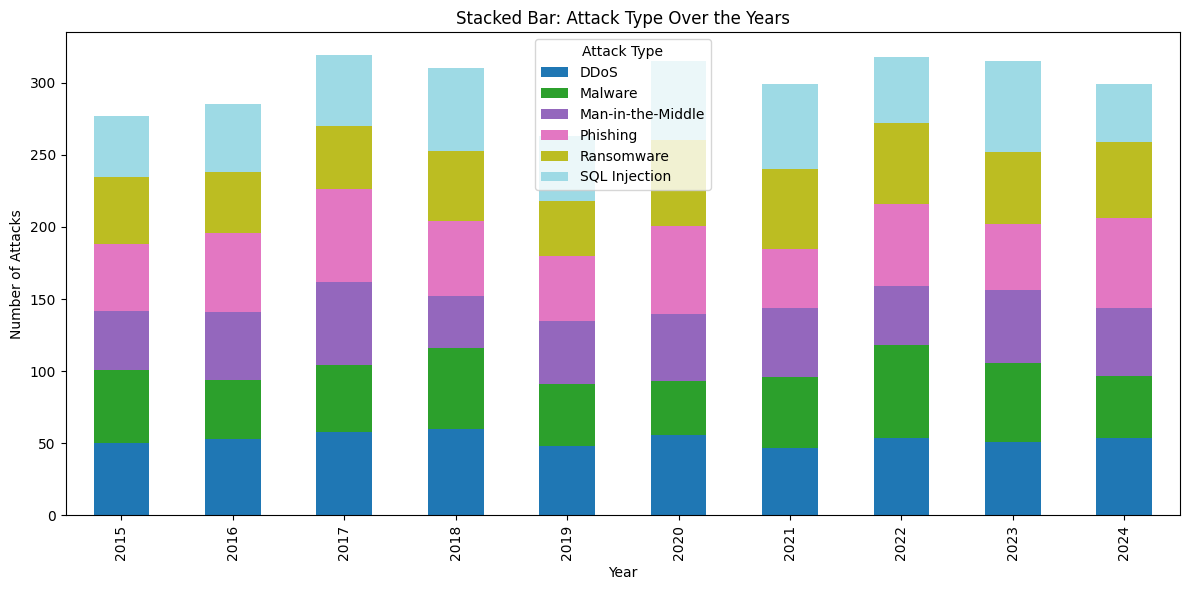

In [ ]:
attack_by_year = pd.crosstab(df['Year'], df['Attack Type'])
attack_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Stacked Bar: Attack Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

Here, we will Train and Test our Model using some Machine Learning Regression Models like:
1. Linear Regression: Linear regression models the relationship between a dependent variable and one or more independent variables using a straight line.

2. Random Forest Regressor: An ensemble method that uses multiple decision trees and averages their results to make a prediction.
Trains multiple trees on random subsets of data and features, then averages their outputs.

3. Decision Tree Regressor:A model that splits data into branches based on feature values to make predictions.
Recursively splits the dataset into regions with the least variance.

4. KNN Regressor:Predicts a value based on the average of the 'K' nearest data points in the feature space.
Finds the K closest neighbors to a point and takes the mean of their values.

# **Linear Regression**

Mean Squared Error: 812.25
R-squared: -0.00


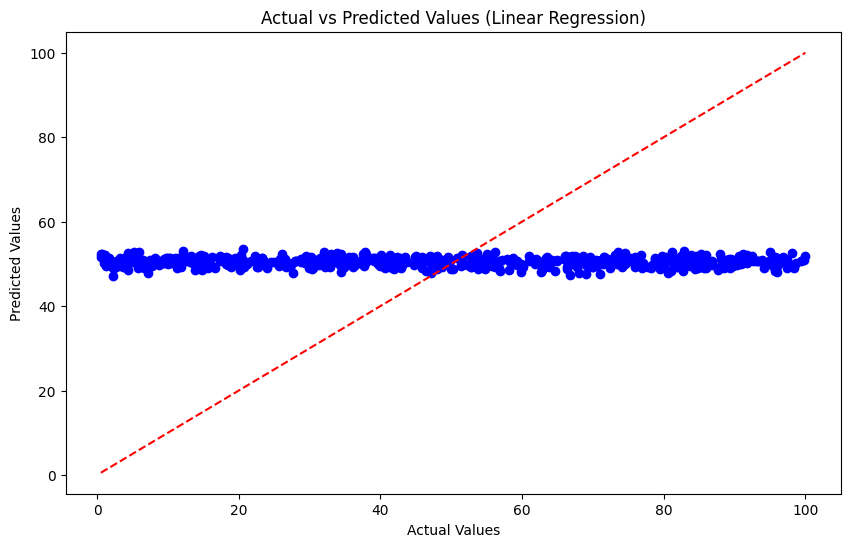

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# df = pd.read_csv('your_file.csv')  # Uncomment and use your actual file path

# Remove rows with missing values
df = df.dropna()

# Select features and target
target = 'Financial Loss (in Million $)'  # Example: predicting financial loss
X = df.drop(columns=[target])  # Features
y = df[target]  # Target variable

# Encode categorical columns
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':  # Check for categorical columns
        X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Ensure there are no NaN or infinite values in the predictions
#if any(pd.isnull(y_pred)) or any(pd.isinf(y_pred)):
    #print("Warning: There are NaN or infinite values in predictions.")
#else:
    # Calculate Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

Interpretation:

MSE: 812.25 — better than all previous models (lowest error so far).

R²: 0.00 — means the model does no better than the average, i.e., it explains none of the variance in the target variable.

# **Random Forest Regression**

Mean Squared Error: 860.72
R-squared: -0.06


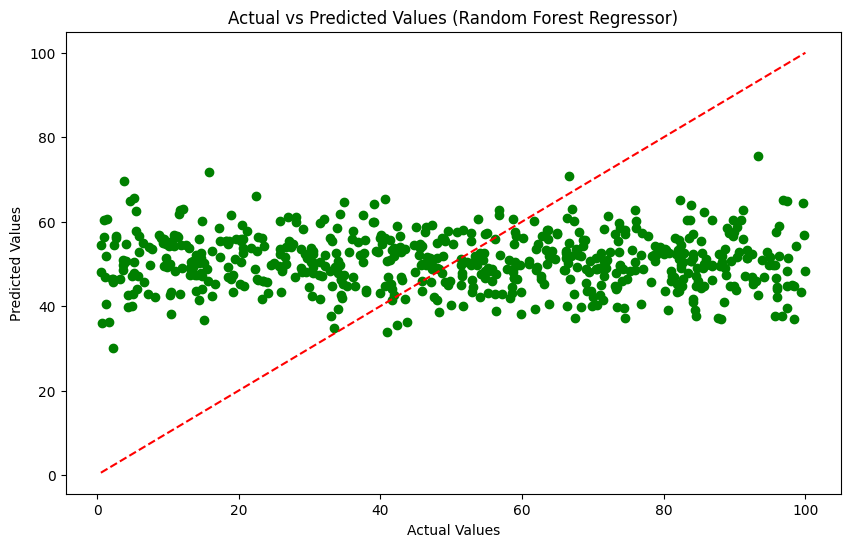

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.show()

Interpretation:

MSE: 860.72 — lower than Decision Tree and KNN, suggesting somewhat smaller average prediction error.

R²: -0.06 — still negative, so the model is underperforming and worse than a horizontal line (predicting the mean value for all inputs).

## **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Decision Tree Regressor - MSE: {mse:.2f}, R²: {r2:.2f}")

Decision Tree Regressor - MSE: 1738.44, R²: -1.15


MSE (Mean Squared Error): 1738.44 — shows how far off the predictions are, on average.

R² (R-squared Score): -1.15 — negative R² indicates very poor performance, worse than a model that just predicts the mean value of the target.

# **K-Nearest Neighbors Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"KNN Regressor - MSE: {mse:.2f}, R²: {r2:.2f}")

KNN Regressor - MSE: 987.38, R²: -0.22


Interpretation:

MSE (Mean Squared Error): 987.38
Lower than the Decision Tree model's MSE (1738.44), so predictions are slightly better in terms of error magnitude.

R² Score (Coefficient of Determination): -0.22
A negative R² indicates that the model performs worse than simply predicting the mean of the target values. Still better than the Decision Tree’s R² of -1.15, but both models are performing poorly.


This suggests your data might have:

High noise or outliers

Insufficient or irrelevant features

Poor feature scaling (especially important for KNN)

**Conclusion:**

None of the models delivered satisfactory predictive results. While Linear Regression had the lowest error, its R² score implies that the model doesn’t capture the underlying patterns of the data. Future work should involve deeper data analysis, feature engineering, and possibly trying advanced techniques like regularization, feature selection, or deep learning models for better performance.